In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc
from dash import html

In [3]:
df=pd.read_csv(r'C:\Users\ritod\OneDrive\Desktop\Dv\Placement_Data_Full_Class.csv',encoding='latin-1')
df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21285 entries, 0 to 21284
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           21285 non-null  int64  
 1   gender          21285 non-null  object 
 2   ssc_p           21285 non-null  float64
 3   ssc_b           21285 non-null  object 
 4   hsc_p           21285 non-null  float64
 5   hsc_b           21285 non-null  object 
 6   hsc_s           21285 non-null  object 
 7   degree_p        21285 non-null  float64
 8   degree_t        21285 non-null  object 
 9   workex          21285 non-null  object 
 10  etest_p         21285 non-null  float64
 11  specialisation  21285 non-null  object 
 12  mba_p           21285 non-null  float64
 13  status          21285 non-null  object 
 14  salary          14652 non-null  float64
dtypes: float64(6), int64(1), object(8)
memory usage: 2.4+ MB


In [5]:
df = df.drop(columns=['sl_no'])

In [6]:
df.isnull().sum()

gender               0
ssc_p                0
ssc_b                0
hsc_p                0
hsc_b                0
hsc_s                0
degree_p             0
degree_t             0
workex               0
etest_p              0
specialisation       0
mba_p                0
status               0
salary            6633
dtype: int64

In [7]:
df['salary'].fillna(0, inplace=True)

In [8]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
df['specialisation'].value_counts()

Mkt&Fin    11880
Mkt&HR      9405
Name: specialisation, dtype: int64

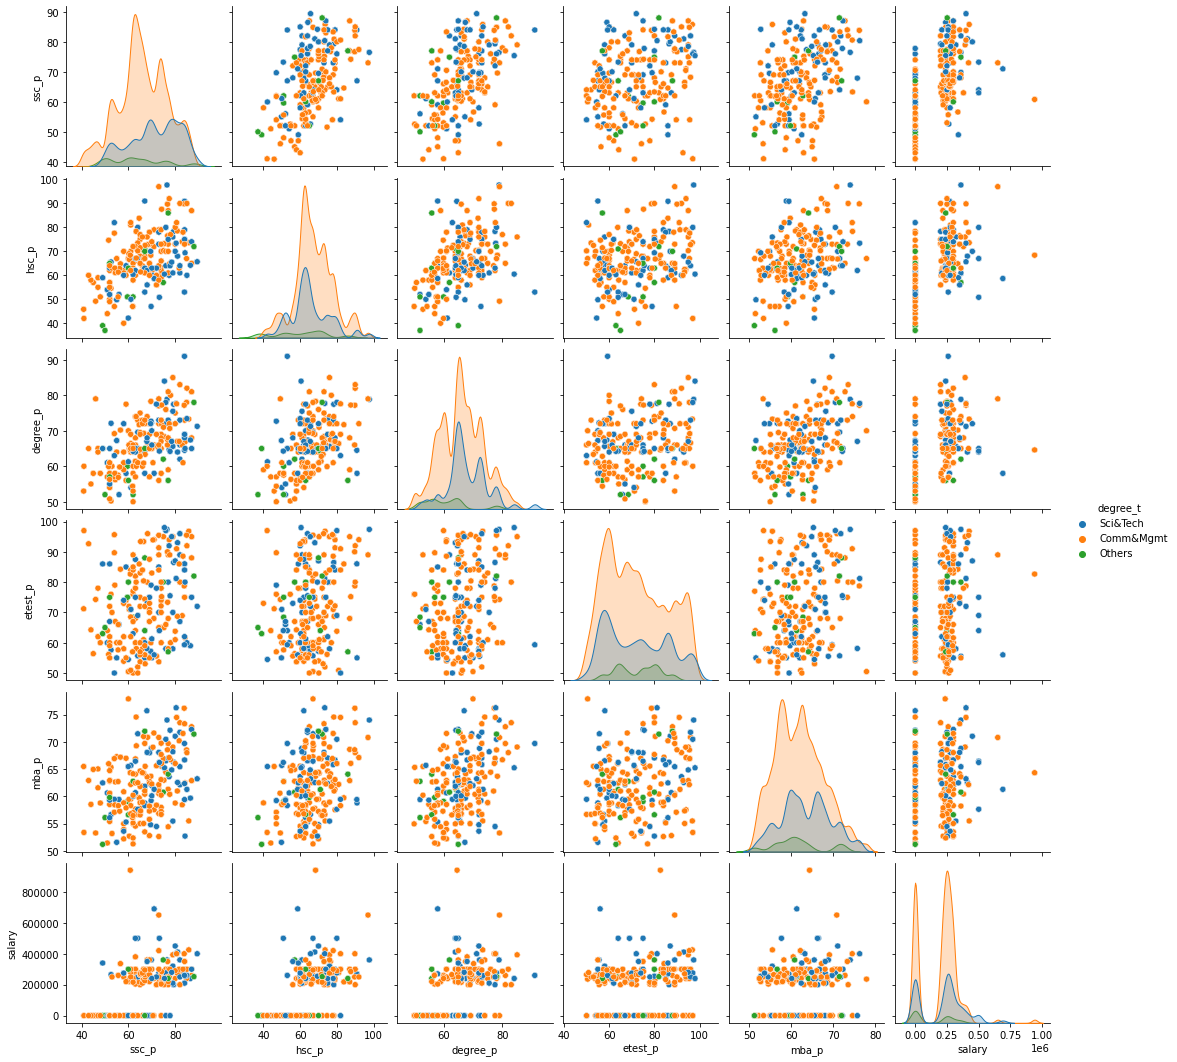

In [10]:
sns.pairplot(df, hue="degree_t")
plt.show()

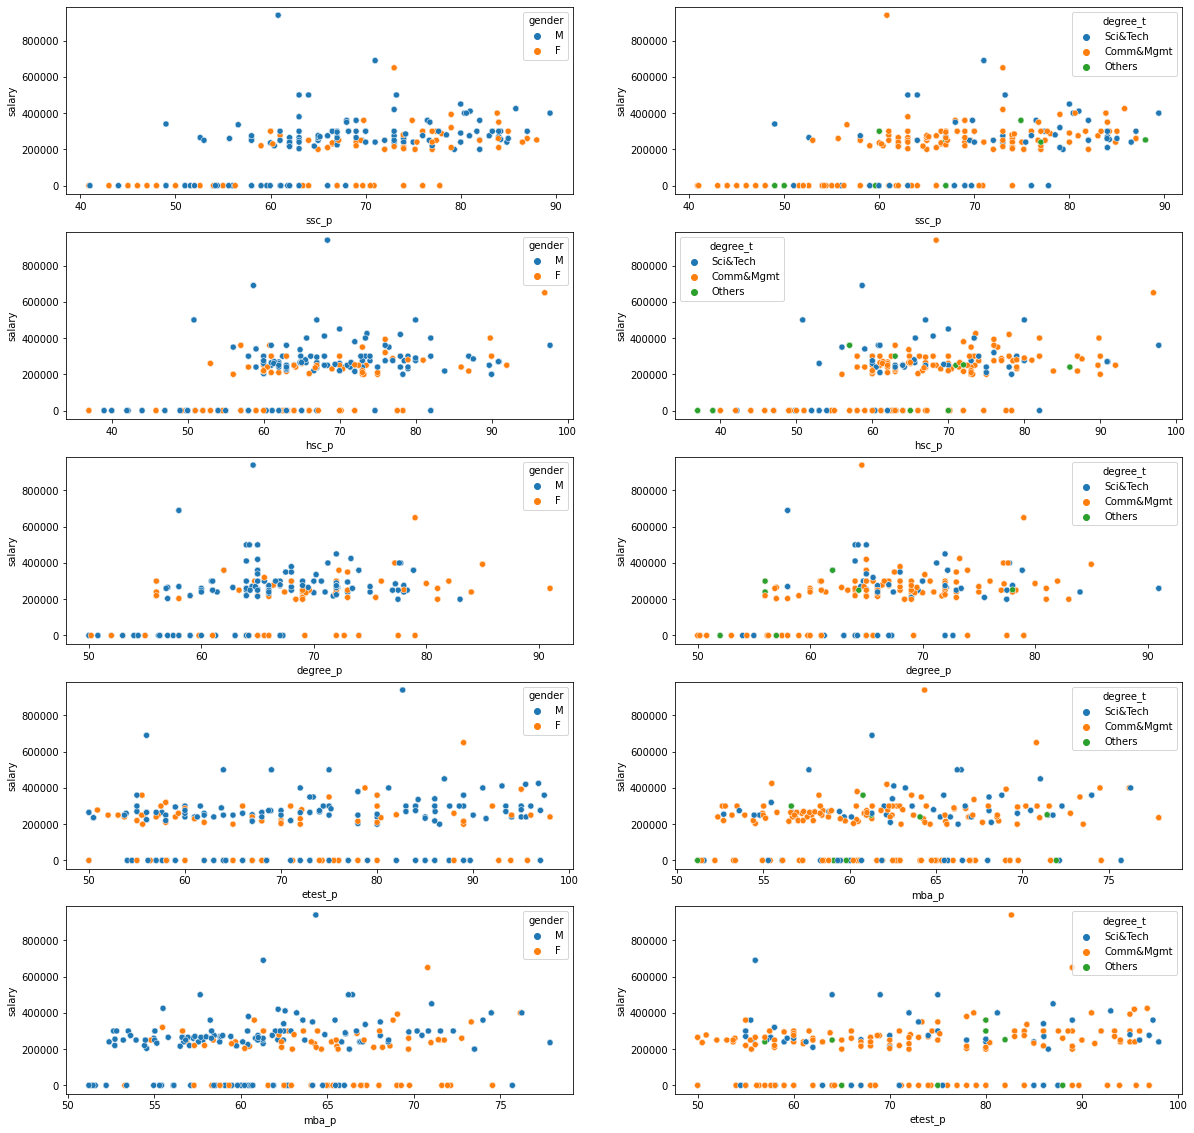

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
sns.scatterplot(data=df, x="ssc_p", y="salary", hue="gender")
plt.subplot(5,2,2)
sns.scatterplot(data=df, x="ssc_p", y="salary", hue="degree_t")
plt.subplot(5,2,3)
sns.scatterplot(data=df, x="hsc_p", y="salary", hue="gender")
plt.subplot(5,2,4)
sns.scatterplot(data=df, x="hsc_p", y="salary", hue="degree_t")
plt.subplot(5,2,5)
sns.scatterplot(data=df, x="degree_p", y="salary", hue="gender")
plt.subplot(5,2,6)
sns.scatterplot(data=df, x="degree_p", y="salary", hue="degree_t")
plt.subplot(5,2,7)
sns.scatterplot(data=df, x="etest_p", y="salary", hue="gender")
plt.subplot(5,2,8)
sns.scatterplot(data=df, x="mba_p", y="salary", hue="degree_t")
plt.subplot(5,2,9)
sns.scatterplot(data=df, x="mba_p", y="salary", hue="gender")
plt.subplot(5,2,10)
sns.scatterplot(data=df, x="etest_p", y="salary", hue="degree_t")
plt.show()


Inference

Candidates who has high score in higher secondary and undergrad got placed
Whomever got high scores in their schools got placed
Comparing the number of students who got placed candidates who got good mba percentage and employability percentage

In [92]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['degree'] = le.fit_transform(df['degree_t'])

In [95]:
df1 = df
le1 = preprocessing.LabelEncoder()
for col in df:
    if(df[col].dtype=='object'):
        df1[col]=le.fit_transform(df[col])

In [96]:
df1.head()

sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1       1  67.00      1  91.00      1      1     58.00         2   
1      2       1  79.33      0  78.33      1      2     77.48         2   
2      3       1  65.00      0  68.00      0      0     64.00         0   
3      4       1  56.00      0  52.00      0      2     52.00         2   
4      5       1  85.80      0  73.60      0      1     73.30         0   

   workex  etest_p  specialisation  mba_p  status    salary  degree  
0       0     55.0               1  58.80       1  270000.0       2  
1       1     86.5               0  66.28       1  200000.0       2  
2       0     75.0               0  57.80       1  250000.0       0  
3       0     66.0               1  59.43       0       NaN       2  
4       0     96.8               0  55.50       1  425000.0       0

In [52]:
import plotly_express as px
gapminder=px.data.gapminder()
px.scatter(df,x="mba_p",y="etest_p",color="status",facet_col="workex")

Inference

There is no relation between mba percentage and employability test
There are many candidates who haven't got placed when they don't have work experience
Most of the candidates who performed better in both tests have got placed

In [15]:
px.violin(df,y="salary",x="specialisation",color="gender",box=True,points="all")

In [91]:
import plotly.graph_objects as go
df_corr = df1.corr() 

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr)
    )
)

In [17]:
df2=pd.read_csv(r'C:\Users\ritod\OneDrive\Desktop\Dv\Placement_Data_Full_Class.csv',encoding='latin-1')

In [104]:
df3 = df2[:700]
fig = px.bar(df3, x='degree_t', y='status',color="gender", barmode= 'group')
fig.update_layout(
    title='Degree Vs Status based on Gedner',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Placed',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1 
)

fig.show()

In [107]:
df1['stat'] = df['status']
fig = px.pie(df1, values='workex', names='stat', title='Work Experience Vs Placement')
fig.show()

In [42]:

fig = px.scatter(df, x="salary", y="ssc_p", color="gender",size ="etest_p",size_max=20, log_x=True)
fig.show()

In [55]:
fig = px.histogram(df, x="salary")
fig.show()

In [71]:
fig = px.box(df, y="etest_p")
fig.show()

In [89]:
fig = px.treemap(df, path=[px.Constant("status"),'degree_t','specialisation','gender'], values='salary')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

[Text(0, 0, 'Placed'), Text(1, 0, 'Not Placed')]

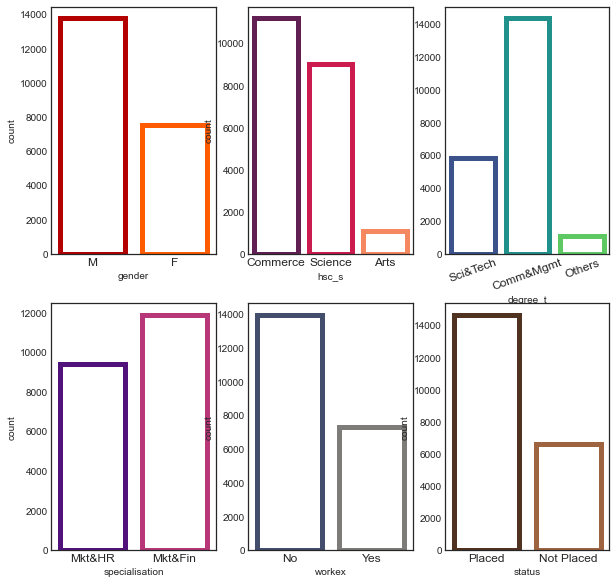

In [110]:
plt.figure(figsize = (20, 15))
plt.style.use('seaborn-white')

#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=df, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

We have more male candidates than female
We have candidates who did commerce as their hsc course and as well as undergrad
Science background candidates are the second highest in both the cases
Candidates from Marketing and Finance dual specialization are high
Most of our candidates from our dataset don't have any work experience
Most of our candidates from our dataset got placed in a company

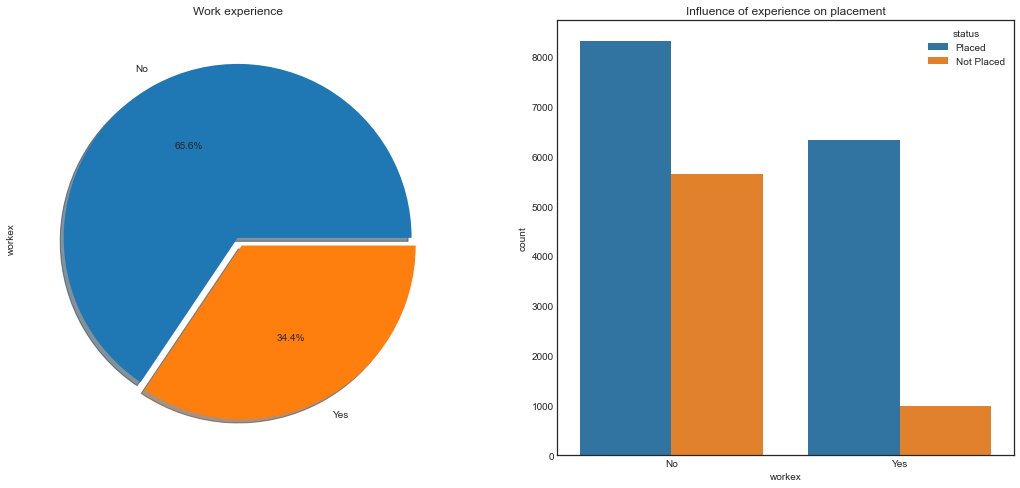

In [4]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = df)
ax[1].set_title('Influence of experience on placement')
plt.show()

We have nearly 66.2% of candidates who never had any work experience
Candidates who never had work experience have got hired more than the ones who had experience
We can conclude that work experience doesn't influence a candidate in the recruitment process